In [70]:
# import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [114]:
pd.set_option('display.max_columns', None)
bank = pd.read_csv('bank-additional-full.csv', delimiter=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [72]:
# đổi unknown bằng null, đổi 999 về null
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [73]:
bank.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [74]:
# duration: tổng tgian cuộc gọi
bank.isnull().sum().sum()

0

In [75]:
bank = bank.drop_duplicates(keep='first')
bank = bank.loc[:,~bank.columns.duplicated()]
bank.shape

(41176, 21)

In [76]:
cat_feats = [col for col in bank.columns\
    if bank[col].dtypes=='object']
num_feats = [col for col in bank.columns\
    if bank[col].dtypes!='object']
len(cat_feats), len(num_feats)

(11, 10)

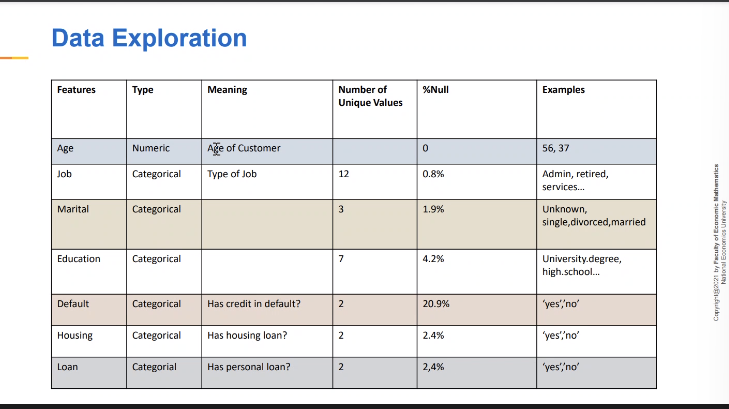

In [77]:
# định dạng ở đây là định dạng trên data mn system, not pandas
bank.default.isnull().sum()

0

In [78]:
bank.columns  # nhóm col thành các nhóm thích hợp ntn?


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [79]:
bank['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [80]:
# bỏ illiterrate
# nhóm basic vào 1 nhóm -> mục đích của EDA



In [81]:
# Data Analysis
# 4 cái đầu: demography, 3 cái sau: lịch sử tín dụng

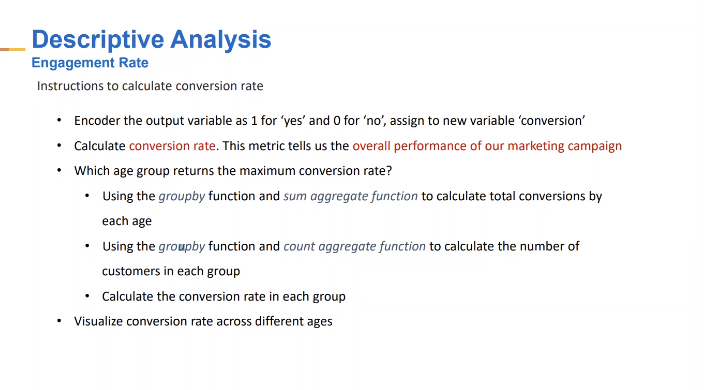

In [82]:
bank['conversion'] = bank['y'].apply(lambda x: 1 if x=='yes' else 0)
print('conversion rate: {:.2%}'.format(bank.conversion.sum()/bank.shape[0]))


conversion rate: 11.27%


## Which age group returns the max conversion rate?


In [83]:
conversion_by_age = bank.groupby('age')['conversion'].sum()
nbr_cus_by_age =bank.groupby('age')['conversion'].count()
conversion_rate = conversion_by_age/nbr_cus_by_age
conversion_rate

age
17    0.400000
18    0.428571
19    0.476190
20    0.353846
21    0.284314
        ...   
91    0.000000
92    0.750000
94    0.000000
95    0.000000
98    1.000000
Name: conversion, Length: 78, dtype: float64

<AxesSubplot: xlabel='age'>

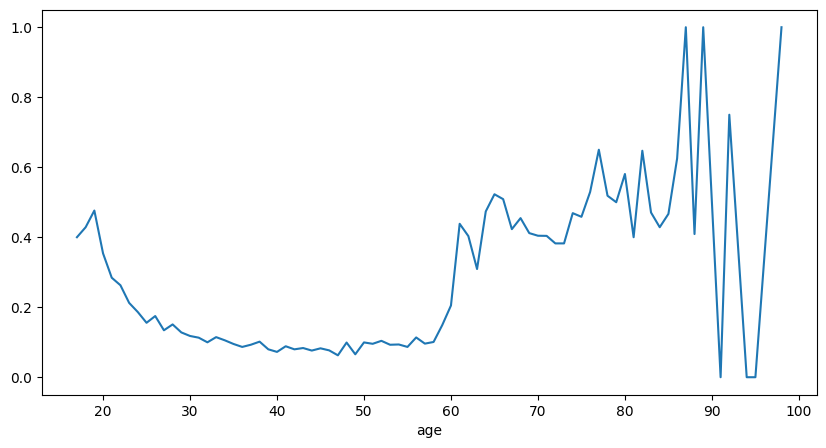

In [84]:
import matplotlib.pyplot as plt
conversion_rate.plot(kind='line', figsize=[10, 5])

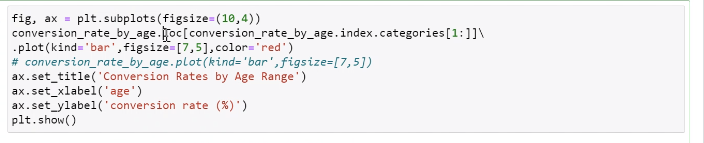

<AxesSubplot: xlabel='age'>

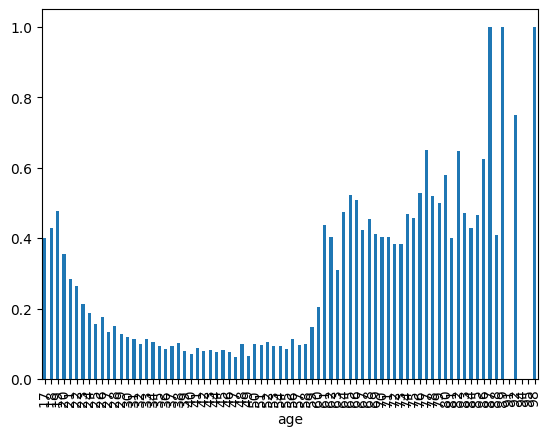

In [85]:
# phân nhóm: 17-25, 25-40, 40-60, >60 -> chia theo kinh nghiệm
conversion_rate.plot(kind='bar')

In [86]:
# chia theo khoảng bằng nhau (set bins)

Cách 2: vẽ biểu đồ phân phối
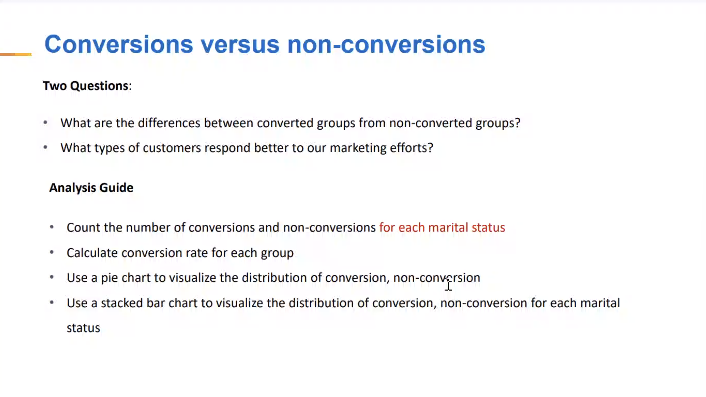

In [87]:
bank.marital.value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

In [88]:
count_marital = bank.groupby('marital')['conversion'].count()

In [89]:
conversion_marital = bank.groupby('marital')['conversion'].sum()
conversion_marital

marital
divorced     476
married     2531
single      1620
unknown       12
Name: conversion, dtype: int64

In [90]:
unconversion_by_marital = count_marital - conversion_marital

In [91]:
conversion_rate_by_marital = conversion_marital/count_marital
conversion_rate_by_marital

marital
divorced    0.103231
married     0.101561
single      0.140090
unknown     0.150000
Name: conversion, dtype: float64

<AxesSubplot: ylabel='conversion'>

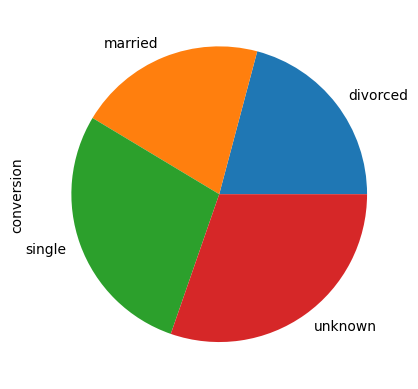

In [92]:
conversion_rate_by_marital.plot(kind='pie')

In [93]:
# fig, ax = plt.subplots()

# ax.bar(labels, unconversion_by_marital, width, yerr=men_std, label='Men')
# ax.bar(labels, conversion_marital, width, yerr=women_std, bottom=men_means,
#        label='Women')

# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.legend()

# plt.show()

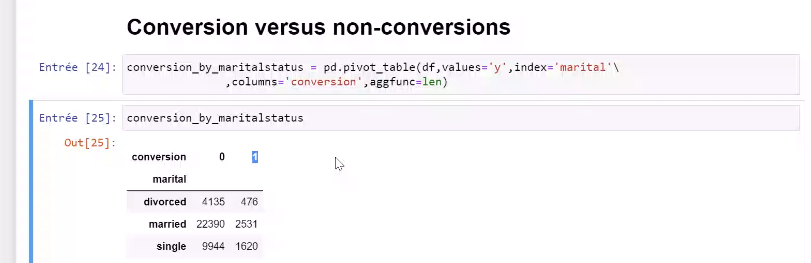

In [94]:
conversion_by_marital = pd.pivot_table(bank, values='y', index='marital', columns='conversion', aggfunc=len)

In [95]:
conversion_by_marital

conversion,0,1
marital,,
divorced,4135,476
married,22390,2531
single,9944,1620
unknown,68,12


In [96]:
# conversion_by_marital.plot(kind='pie')

In [97]:
# Nên dùng stacked bar thay pie chart

In [98]:
# xem lại thui chán quáaa

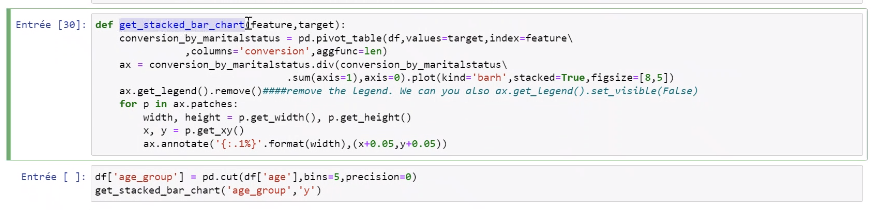

In [99]:
bank.contact.value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

In [100]:
def get_stacked_bar(feature, target):
    conversion_by_gr = pd.pivot_table(bank, values=target,index=feature\
        , columns='conversion', aggfunc=len)
    ax = conversion_by_gr.div(conversion_by_gr.sum(axis=1),axis=0).plot(kind='barh', stacked=True, figsize=[8,5])
    ax.get_legend().remove()
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate('{:.1%}'.format(width), (x + 0.05, y))

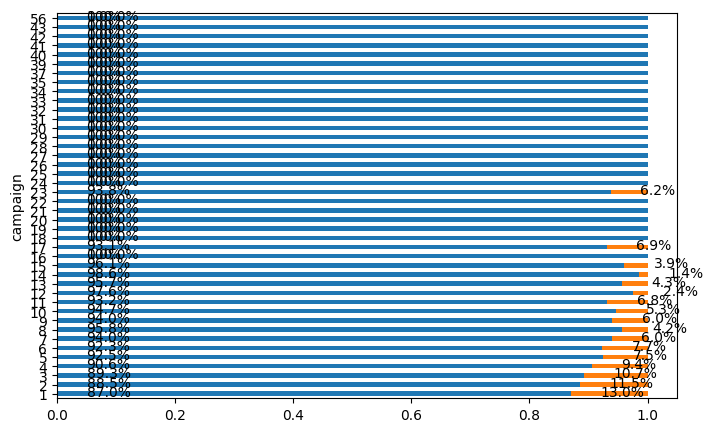

In [101]:
get_stacked_bar('campaign', 'y')

Vấn đề: các giá trị rất sát nhau -> chia ra các giá trị >= 1000 và < 1000 counts
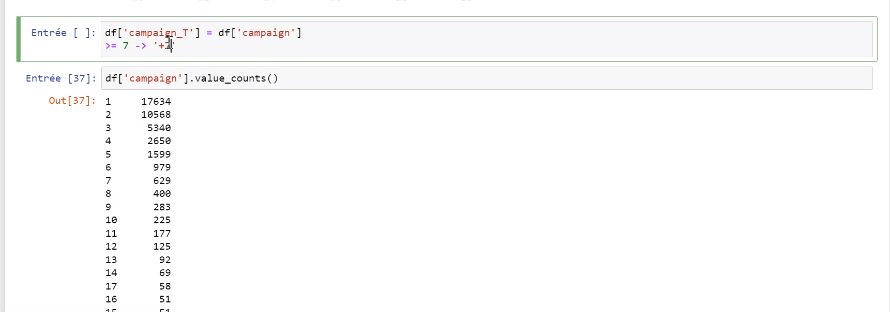

In [102]:
bank['campaign_T'] = bank['campaign'].apply(lambda x: '7+' if x>= 7 else x)

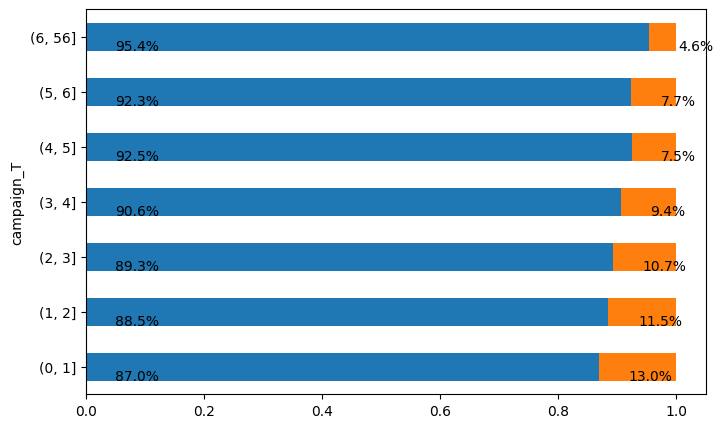

In [103]:
bank['campaign_T'] = pd.cut(bank['campaign'], bins=[0,1,2,3,4,5,6,56])
# insight: gọi 4 lần k được thì đừng gọi nữa
get_stacked_bar('campaign_T', 'y')

## Optimal Duration

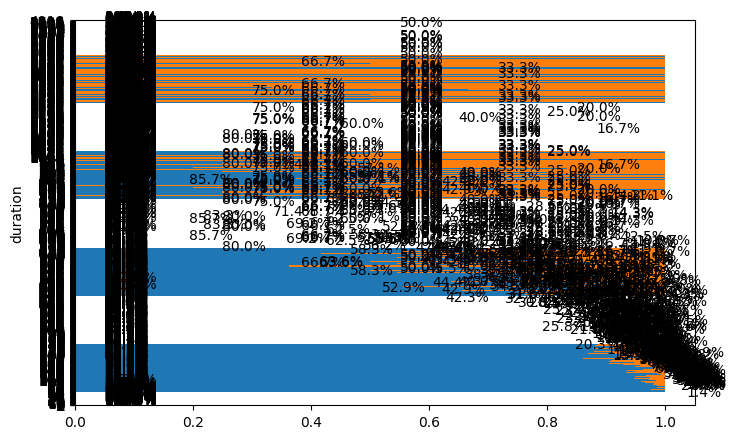

In [104]:
get_stacked_bar('duration', 'y')

In [105]:
bank['mins'] = round(bank.duration/60)

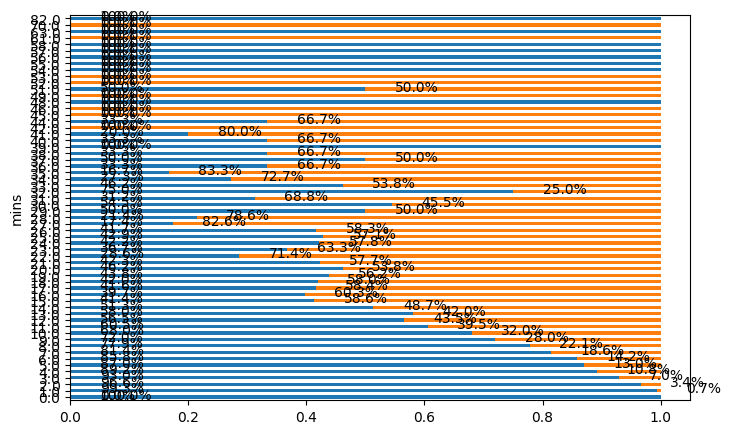

In [106]:
get_stacked_bar('mins', 'y')

In [107]:
# lệch phải: phần đuôi rất ít quan sát -> k dùng pd.cut mà dùng qcut để chia đều theo phần trăm

In [108]:
bank['mins_T'] = pd.qcut(bank['mins'], 10)
get_stacked_bar('mins_T', 'y')

ValueError: Bin edges must be unique: array([ 0.,  1.,  1.,  2.,  2.,  3.,  4.,  5.,  6.,  9., 82.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [ ]:
# cô gửi báo cáo mẫu để tham khảo tạo framework (k nộp)
# bài tập: ptich 5 biến social economics -> có phân tích nhận xét, 
# nộp file ipynb
# regression -> so sánh mức độ ảnh hưởng mạnh yếu của các biến 
# đến outcome y (như kinh tế lượng) (sau tết) 
# làm lại phân tích và EDA toàn bộ nhưng cô chú ý đến phần 5 biến kia



In [ ]:
Dashboard - không nộp code: 
- tính toán đúng (có thể note lại idea) - 70%
- thẩm mỹ (kết hợp hài hòa màu sắc) - 30% 

In [ ]:
bank.default.value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

chuyển yes thành uk

In [ ]:
bank.education.value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

- Comments:
basic 3 giá trị -> gộp
illiterate 18 bản -> quá ít, không có giá trị -> xóa hoặc gộp nhóm khác
- Encoding:
không thứ bậc (vd: tỉnh thành) -> OneHot
thứ bậc

In [116]:
df = bank

In [117]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

### Xử lí với 330 unknown -> từ age suy ra job:
lấy mode job của độ tuổi đó fill vào job
vd. khoảng 20 -> students

Trong th này không cải thiện nhiều nhưng chú ý idea


In [ ]:
age_list=df[df['job']=='unknown']['age'].value_counts().index
age_list

Int64Index([45, 55, 53, 44, 35, 41, 32, 34, 38, 50, 49, 52, 47, 43, 56, 46, 60,
            58, 30, 59, 57, 42, 48, 27, 28, 24, 64, 26, 36, 37, 61, 33, 31, 25,
            81, 40, 51, 66, 54, 63, 78, 76, 65, 29, 69, 72, 62, 67],
           dtype='int64')

In [ ]:
df[df.age==45]['job'].value_counts().idxmax()

'blue-collar'

In [ ]:
for age in age_list:
    df.loc[((df.age==age) & (df.job=='unknown')), ['job']] = df[df.age==age]['job'].value_counts().idxmax()

In [ ]:
df.job.value_counts()

admin.           10544
blue-collar       9408
technician        6739
services          3967
management        2924
retired           1762
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            881
Name: job, dtype: int64

### month
Jan -> 1...


In [118]:
df.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [161]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [162]:
dict_month = {'may': 5, 'jul': 7, 'aug': 8, 'jun': 6, 'nov': 11, 'apr': 4, 'oct': 10, 'sep': 9, 'mar': 3, 'dec': 12}
# df.month = 
df.month.map(dict_month)
df.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [163]:
# Encoding:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = df.month.apply(lambda x: months.index(x)+1)
# df.month


In [164]:
df.month

0         5
1         5
2         5
3         5
4         5
         ..
41183    11
41184    11
41185    11
41186    11
41187    11
Name: month, Length: 41188, dtype: int64

In [165]:
# Encoding
# Create dummy variables for job
jobs_encoded_df = pd.get_dummies(df.job, prefix='job')
jobs_encoded_df 



,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,1,0,0,0,0,0,0
41184,0,1,0,0,0,0,0,0,0,0,0,0
41185,0,0,0,0,0,1,0,0,0,0,0,0
41186,0,0,0,0,0,0,0,0,0,1,0,0


Pbiet cách dùng get_dummies/ onehot: onehot cho vào pipeline được

In [166]:

df = pd.concat([df, jobs_encoded_df], axis=1)

In [167]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,5,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,5,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,5,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,5,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,11,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,0,1,0,0,0,0,0,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,11,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,1,0,0,0,0,0,0,0,0,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,11,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,0,0,0,0,1,0,0,0,0,0,0
41186,44,technician,married,professional.course,no,no,no,cellular,11,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,0,0,0,0,0,1,0,0


In [168]:

df = pd.concat([df, pd.get_dummies(df.marital, prefix='marital')], axis=1)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,57,services,married,high.school,unknown,no,no,telephone,5,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,37,services,married,high.school,no,yes,no,telephone,5,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,5,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,56,services,married,high.school,no,no,yes,telephone,5,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,11,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,11,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,11,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
41186,44,technician,married,professional.course,no,no,no,cellular,11,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [169]:

df = pd.concat([df, pd.get_dummies(df.poutcome, prefix='poutcome')], axis=1)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,57,services,married,high.school,unknown,no,no,telephone,5,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,37,services,married,high.school,no,yes,no,telephone,5,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,5,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,5,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,11,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,11,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
41185,56,retired,married,university.degree,no,yes,no,cellular,11,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
41186,44,technician,married,professional.course,no,no,no,cellular,11,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [170]:

df = pd.concat([df, pd.get_dummies(df.contact, prefix='contact')], axis=1)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,57,services,married,high.school,unknown,no,no,telephone,5,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
2,37,services,married,high.school,no,yes,no,telephone,5,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
3,40,admin.,married,basic.6y,no,no,no,telephone,5,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,56,services,married,high.school,no,no,yes,telephone,5,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,11,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,11,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
41185,56,retired,married,university.degree,no,yes,no,cellular,11,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
41186,44,technician,married,professional.course,no,no,no,cellular,11,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0


In [173]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [182]:
# education
df.education = df.education.str.replace('basic.+', 'basic', regex=True)
df
categoriess = pd.Categorical(df['education'], categories=['unknown', 'illiterate', 'basic', 'high.school', 'university.degree', 'professional.course'])
# vẫn có thể dùng các cách như trước
df.education = categoriess.codes

In [184]:
for att in ['housing', 'loan', 'default']:
    df[att] = df[att].apply(lambda x: 1 if x == 'yes' else 0)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone
0,56,housemaid,married,2,0,0,0,telephone,5,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,57,services,married,3,0,0,0,telephone,5,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
2,37,services,married,3,0,0,0,telephone,5,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
3,40,admin.,married,2,0,0,0,telephone,5,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,56,services,married,3,0,0,0,telephone,5,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,5,0,0,0,cellular,11,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
41184,46,blue-collar,married,5,0,0,0,cellular,11,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
41185,56,retired,married,4,0,0,0,cellular,11,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
41186,44,technician,married,5,0,0,0,cellular,11,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0


In [190]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'contact_cellular', 'contact_telephone'],
      dtype='object')

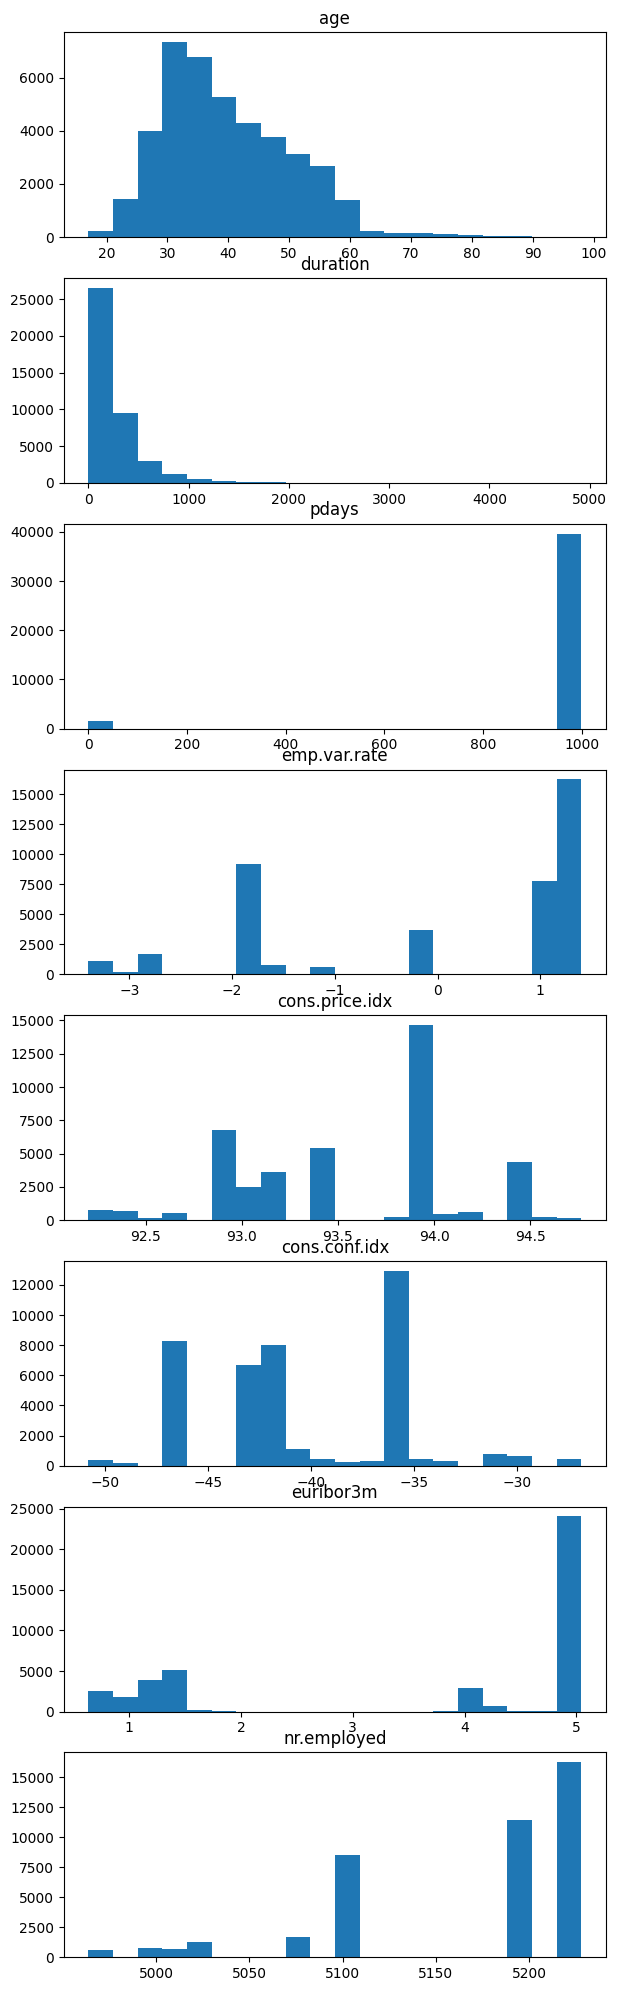

In [192]:
fig, ax = plt.subplots(8,figsize=[7,25])
i = 0
for col in ['age', 'duration',  'pdays',
        'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']:
    ax[i].hist(df[col], bins=20)
    ax[i].set_title(col)
    i += 1

In [ ]:
age khá chuẩn
duration lệch phải -> log transform để phân bố chuẩn hơn
biến rời rạch (các biến social/ eco) -> k dùng transform
pdays: rất lớn, tập trung vào gần 1000 -> đây là unknown -> drop Attribute


In [196]:
from sklearn.preprocessing import MinMaxScaler
df.duration = df['duration'].apply(lambda x: np.log(x + 0.0001))
for col in ['age', 'duration', 
         'cons.price.idx',
       'cons.conf.idx',  'nr.employed']:
    df[col] = MinMaxScaler().fit_transform(df[[col]])

In [198]:
# RFE: tìm số lượng feature tối ưu & giải thích
pass


In [199]:
# Stats model

In [200]:
logit.summary()
# không cho biết tính giải thích: tăng 1% -> kết quả tăng bn, biến nào quan trọng hơn biến nào

NameError: name 'logit' is not defined

In [ ]:
# giải quyết vấn đề đó:
margeff = logit_fit.get_margeff(at='overall', method='eyex', atexog=None, dummy=False, count=False)